In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
cancerset=load_breast_cancer()

In [3]:
cancerset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df=pd.DataFrame(data=cancerset.data)

df

0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          9   ...      20     21      22      23       24       25      26  \
0    0.07871  ...  25.380  17.33  184.60  2019.0  0.16220  0.66560  0.7119   
1    0.05667  ...  24.990  23.41  158.80  1956.0  0.12380  0.18660  0.2416   
2    0.05999  ...  23.570  25.53  152.50  1709.0  0.14440  0.42450  0.4504   
3    0.09744  ...  14.910  26.50   98.87   567.7  0.20980  0.86630  0.6869   
4    0.05883  ...  22.540  16.67  152.20  1575.0  0.13740  0.20500  0.4000   
..       ...  ...     ...    ...     ...     ...      ...      ...     ...   
564  0.05623  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130  0.4107   
565  0.05533  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220  0.3215   
566  0.05648  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940  0.3403   
567  0.07016  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810  0.9387   
568  0.05884  ...   9.456  30.37   59.16   268.6  0.08996  0.06444  0.0000   

         27      28       29  
0    0.2654  0.4601  0.11890  
1    0.1860  0.2750  0.08902  
2    0.2430  0.3613  0.08758  
3    0.2575  0.6638  0.17300  
4    0.1625  0.2364  0.07678  
..      ...     ...      ...  
564  0.2216  0.2060  0.07115  
565  0.1628  0.2572  0.06637  
566  0.1418  0.2218  0.07820  
567  0.2650  0.4087  0.12400  
568  0.0000  0.2871  0.07039  

[569 rows x 30 columns]

In [5]:
x=df.iloc[:,1]
x

0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: 1, Length: 569, dtype: float64

In [6]:
cancerset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
cancerset.values()

dict_values([array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       

In [8]:
cancerset.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [9]:
cancerset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
cancerset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
cancerset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
cancerset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
cancerset.data.shape

(569, 30)

In [14]:
df_cancer=pd.DataFrame(cancerset.data)

In [15]:
df_cancer

0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          9   ...      20     21      22      23       24       25      26  \
0    0.07871  ...  25.380  17.33  184.60  2019.0  0.16220  0.66560  0.7119   
1    0.05667  ...  24.990  23.41  158.80  1956.0  0.12380  0.18660  0.2416   
2    0.05999  ...  23.570  25.53  152.50  1709.0  0.14440  0.42450  0.4504   
3    0.09744  ...  14.910  26.50   98.87   567.7  0.20980  0.86630  0.6869   
4    0.05883  ...  22.540  16.67  152.20  1575.0  0.13740  0.20500  0.4000   
..       ...  ...     ...    ...     ...     ...      ...      ...     ...   
564  0.05623  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130  0.4107   
565  0.05533  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220  0.3215   
566  0.05648  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940  0.3403   
567  0.07016  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810  0.9387   
568  0.05884  ...   9.456  30.37   59.16   268.6  0.08996  0.06444  0.0000   

         27      28       29  
0    0.2654  0.4601  0.11890  
1    0.1860  0.2750  0.08902  
2    0.2430  0.3613  0.08758  
3    0.2575  0.6638  0.17300  
4    0.1625  0.2364  0.07678  
..      ...     ...      ...  
564  0.2216  0.2060  0.07115  
565  0.1628  0.2572  0.06637  
566  0.1418  0.2218  0.07820  
567  0.2650  0.4087  0.12400  
568  0.0000  0.2871  0.07039  

[569 rows x 30 columns]

In [16]:
df_cancer=pd.DataFrame(cancerset.data,columns=cancerset.feature_names)
df_cancer
pd.set_option('display.max_rows', None)

In [17]:
df_cancer['target']=pd.DataFrame(data=cancerset.target)

In [18]:
df_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
30        18.630         25.11          124.80     1088.0          0.10640   
31        11.840         18.70           77.93      440.6          0.11090   
32        17.020         23.98          112.80      899.3          0.11970   
33        19.270         26.47          127.90     1162.0          0.09401   
34        16.130         17.88          107.00      807.2          0.10400   
35        16.740         21.59          110.10      869.5          0.09610   
36        14.250         21.72           93.63      633.0          0.09823   
37        13.030         18.42           82.61      523.8          0.08983   
38        14.990         25.20           95.54      698.8          0.09387   
39        13.480         20.82           88.40      559.2          0.10160   
40        13.440         21.58           86.18      563.0          0.08162   
41        10.950         21.35           71.90      371.1          0.12270   
42        19.070         24.81          128.30     1104.0          0.09081   
43        13.280         20.28           87.32      545.2          0.10410   
44        13.170         21.81           85.42      531.5          0.09714   
45        18.650         17.60          123.70     1076.0          0.10990   
46         8.196         16.84           51.71      201.9          0.08600   
47        13.170         18.66           85.98      534.6          0.11580   
48        12.050         14.63           78.04      449.3          0.10310   
49        13.490         22.30           86.91      561.0          0.08752   
50        11.760         21

In [19]:
cancerset.data.shape

(569, 30)

In [20]:
df_cancer.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [21]:
df_cancer.isnull()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          False         False           False      False            False   
1          False         False           False      False            False   
2          False         False           False      False            False   
3          False         False           False      False            False   
4          False         False           False      False            False   
5          False         False           False      False            False   
6          False         False           False      False            False   
7          False         False           False      False            False   
8          False         False           False      False            False   
9          False         False           False      False            False   
10         False         False           False      False            False   
11         False         False           False      False            False   
12         False         False           False      False            False   
13         False         False           False      False            False   
14         False         False           False      False            False   
15         False         False           False      False            False   
16         False         False           False      False            False   
17         False         False           False      False            False   
18         False         False           False      False            False   
19         False         False           False      False            False   
20         False         False           False      False            False   
21         False         False           False      False            False   
22         False         False           False      False            False   
23         False         False           False      False            False   
24         False         False           False      False            False   
25         False         False           False      False            False   
26         False         False           False      False            False   
27         False         False           False      False            False   
28         False         False           False      False            False   
29         False         False           False      False            False   
30         False         False           False      False            False   
31         False         False           False      False            False   
32         False         False           False      False            False   
33         False         False           False      False            False   
34         False         False           False      False            False   
35         False         False           False      False            False   
36         False         False           False      False            False   
37         False         False           False      False            False   
38         False         False           False      False            False   
39         False         False           False      False            False   
40         False         False           False      False            False   
41         False         False           False      False            False   
42         False         False           False      False            False   
43         False         False           False      False            False   
44         False         False           False      False            False   
45         False         False           False      False            False   
46         False         False           False      False            False   
47         False         False           False      False            False   
48         False         False           False      False            False   
49         False         False           False      False            False   
50         False         Fa

In [22]:
df_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [23]:
df_cancer.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[5 rows x 31 columns]

In [24]:
df_cancer.head(569)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
30        18.630         25.11          124.80     1088.0          0.10640   
31        11.840         18.70           77.93      440.6          0.11090   
32        17.020         23.98          112.80      899.3          0.11970   
33        19.270         26.47          127.90     1162.0          0.09401   
34        16.130         17.88          107.00      807.2          0.10400   
35        16.740         21.59          110.10      869.5          0.09610   
36        14.250         21.72           93.63      633.0          0.09823   
37        13.030         18.42           82.61      523.8          0.08983   
38        14.990         25.20           95.54      698.8          0.09387   
39        13.480         20.82           88.40      559.2          0.10160   
40        13.440         21.58           86.18      563.0          0.08162   
41        10.950         21.35           71.90      371.1          0.12270   
42        19.070         24.81          128.30     1104.0          0.09081   
43        13.280         20.28           87.32      545.2          0.10410   
44        13.170         21.81           85.42      531.5          0.09714   
45        18.650         17.60          123.70     1076.0          0.10990   
46         8.196         16.84           51.71      201.9          0.08600   
47        13.170         18.66           85.98      534.6          0.11580   
48        12.050         14.63           78.04      449.3          0.10310   
49        13.490         22.30           86.91      561.0          0.08752   
50        11.760         21

In [25]:
df_cancer.sample()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
108        22.27         19.67           152.8     1509.0           0.1326   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
108            0.2768          0.4264               0.1823         0.2556   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
108                 0.07039  ...          28.01            206.8      2360.0   

     worst smoothness  worst compactness  worst concavity  \
108            0.1701             0.6997           0.9608   

     worst concave points  worst symmetry  worst fractal dimension  target  
108                 0.291          0.4055                  0.09789       0  

[1 rows x 31 columns]

In [26]:
df_cancer.sample(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
147        14.95         18.77           97.84      689.5          0.08138   
483        13.70         17.64           87.76      571.1          0.09950   
148        14.44         15.18           93.97      640.1          0.09970   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
147           0.11670         0.09050              0.03562         0.1744   
483           0.07957         0.04548              0.03160         0.1732   
148           0.10210         0.08487              0.05532         0.1724   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
147                 0.06493  ...          25.47           107.10       809.7   
483                 0.06088  ...          23.53            95.78       686.5   
148                 0.06081  ...          19.85           108.60       766.9   

     worst smoothness  worst compactness  worst concavity  \
147            0.0997             0.2521           0.2500   
483            0.1199             0.1346           0.1742   
148            0.1316             0.2735           0.3103   

     worst concave points  worst symmetry  worst fractal dimension  target  
147               0.08405          0.2852                  0.09218       1  
483               0.09077          0.2518                  0.06960       1  
148               0.15990          0.2691                  0.07683       1  

[3 rows x 31 columns]

In [27]:
dfcor=df_cancer.corr()
dfcor

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
target                     -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

In [28]:
#sns.pairplot(df_cancer)

<AxesSubplot:xlabel='target', ylabel='count'>

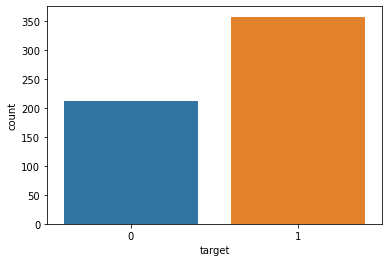

In [29]:
sns.countplot(df_cancer['target'])

<AxesSubplot:>

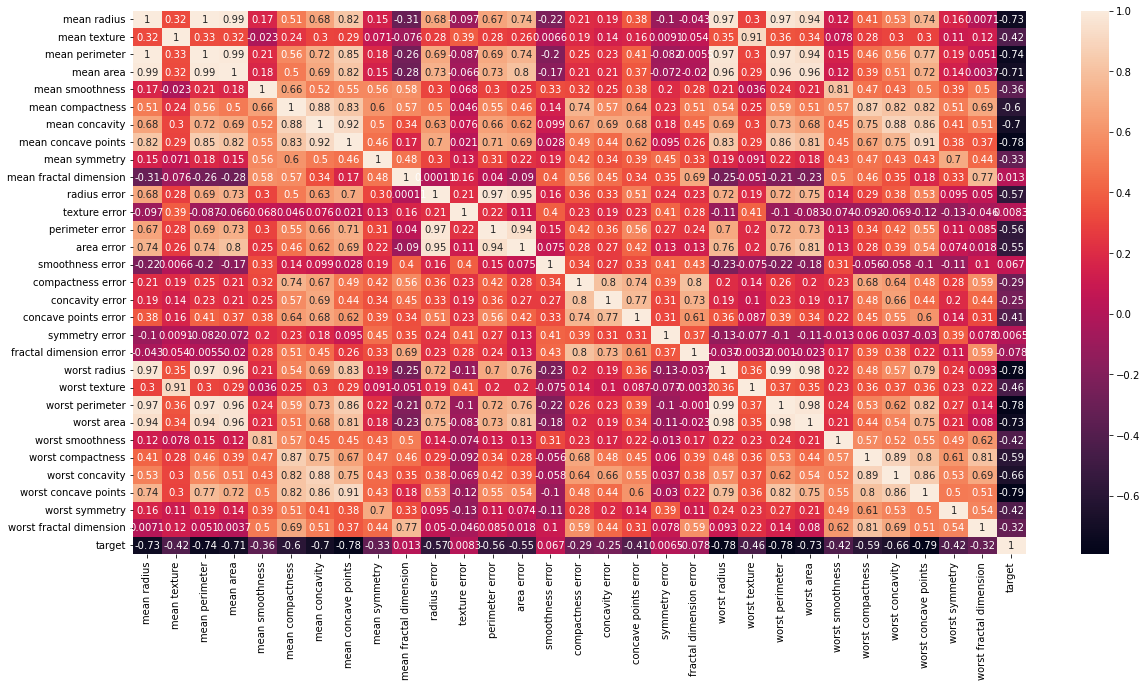

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(),annot=True)

In [31]:
df_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
30        18.630         25.11          124.80     1088.0          0.10640   
31        11.840         18.70           77.93      440.6          0.11090   
32        17.020         23.98          112.80      899.3          0.11970   
33        19.270         26.47          127.90     1162.0          0.09401   
34        16.130         17.88          107.00      807.2          0.10400   
35        16.740         21.59          110.10      869.5          0.09610   
36        14.250         21.72           93.63      633.0          0.09823   
37        13.030         18.42           82.61      523.8          0.08983   
38        14.990         25.20           95.54      698.8          0.09387   
39        13.480         20.82           88.40      559.2          0.10160   
40        13.440         21.58           86.18      563.0          0.08162   
41        10.950         21.35           71.90      371.1          0.12270   
42        19.070         24.81          128.30     1104.0          0.09081   
43        13.280         20.28           87.32      545.2          0.10410   
44        13.170         21.81           85.42      531.5          0.09714   
45        18.650         17.60          123.70     1076.0          0.10990   
46         8.196         16.84           51.71      201.9          0.08600   
47        13.170         18.66           85.98      534.6          0.11580   
48        12.050         14.63           78.04      449.3          0.10310   
49        13.490         22.30           86.91      561.0          0.08752   
50        11.760         21

In [32]:
x=df_cancer.drop(['target'],axis=1)
x

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
30        18.630         25.11          124.80     1088.0          0.10640   
31        11.840         18.70           77.93      440.6          0.11090   
32        17.020         23.98          112.80      899.3          0.11970   
33        19.270         26.47          127.90     1162.0          0.09401   
34        16.130         17.88          107.00      807.2          0.10400   
35        16.740         21.59          110.10      869.5          0.09610   
36        14.250         21.72           93.63      633.0          0.09823   
37        13.030         18.42           82.61      523.8          0.08983   
38        14.990         25.20           95.54      698.8          0.09387   
39        13.480         20.82           88.40      559.2          0.10160   
40        13.440         21.58           86.18      563.0          0.08162   
41        10.950         21.35           71.90      371.1          0.12270   
42        19.070         24.81          128.30     1104.0          0.09081   
43        13.280         20.28           87.32      545.2          0.10410   
44        13.170         21.81           85.42      531.5          0.09714   
45        18.650         17.60          123.70     1076.0          0.10990   
46         8.196         16.84           51.71      201.9          0.08600   
47        13.170         18.66           85.98      534.6          0.11580   
48        12.050         14.63           78.04      449.3          0.10310   
49        13.490         22.30           86.91      561.0          0.08752   
50        11.760         21

In [33]:
y=df_cancer['target']
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     1
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     1
47     0
48     1
49     1
50     1
51     1
52     1
53     0
54     0
55     1
56     0
57     0
58     1
59     1
60     1
61     1
62     0
63     1
64     0
65     0
66     1
67     1
68     1
69     1
70     0
71     1
72     0
73     0
74     1
75     0
76     1
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     0
86     0
87     0
88     1
89     1
90     1
91     0
92     1
93     1
94     0
95     0
96     1
97     1
98     1
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    1
107    1
108    0
109    1
110    1
1

In [34]:
x.shape
y.shape

(569,)

In [35]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=45)

In [36]:
train_x

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
303       10.490         18.61           66.86      334.3          0.10680   
168       17.470         24.68          116.10      984.6          0.10490   
388       11.270         15.50           73.38      392.0          0.08365   
550       10.860         21.48           68.51      360.5          0.07431   
485       12.450         16.41           82.85      476.7          0.09514   
461       27.420         26.27          186.90     2501.0          0.10840   
337       18.770         21.43          122.90     1092.0          0.09116   
150       13.000         20.78           83.51      519.4          0.11350   
73        13.800         15.79           90.43      584.1          0.10070   
214       14.190         23.81           92.87      610.7          0.09463   
96        12.180         17.84           77.79      451.1          0.10450   
225       14.340         13.47           92.51      641.2          0.09906   
22        15.340         14.26          102.50      704.4          0.10730   
534       10.960         17.62           70.79      365.6          0.09687   
20        13.080         15.71           85.63      520.0          0.10750   
355       12.560         19.07           81.92      485.8          0.08760   
47        13.170         18.66           85.98      534.6          0.11580   
541       14.470         24.99           95.81      656.4          0.08837   
519       12.750         16.70           82.51      493.8          0.11250   
293       11.850         17.46           75.54      432.7          0.08372   
289       11.370         18.89           72.17      396.0          0.08713   
44        13.170         21.81           85.42      531.5          0.09714   
556       10.160         19.59           64.73      311.7          0.10030   
298       14.260         18.17           91.22      633.1          0.06576   
383       12.390         17.48           80.64      462.9          0.10420   
269       10.710         20.39           69.50      344.9          0.10820   
339       23.510         24.27          155.10     1747.0          0.10690   
521       24.630         21.60          165.50     1841.0          0.10300   
46         8.196         16.84           51.71      201.9          0.08600   
279       13.850         15.18           88.99      587.4          0.09516   
40        13.440         21.58           86.18      563.0          0.08162   
318        9.042         18.90           60.07      244.5          0.09968   
13        15.850         23.95          103.70      782.7          0.08401   
347       14.760         14.74           94.87      668.7          0.08875   
450       11.870         21.54           76.83      432.0          0.06613   
122       24.250         20.20          166.20     1761.0          0.14470   
148       14.440         15.18           93.97      640.1          0.09970   
10        16.020         23.24          102.70      797.8          0.08206   
389       19.550         23.21          128.90     1174.0          0.10100   
281       11.740         14.02           74.24      427.3          0.07813   
422       11.610         16.02           75.46      408.2          0.10880   
120       11.410         10.82           73.34      403.3          0.09373   
317       18.220         18.87          118.70     1027.0          0.09746   
508       16.300         15.70          104.70      819.8          0.09427   
282       19.400         18.18          127.20     1145.0          0.10370   
286       11.940         20.76           77.87      441.0          0.08605   
533       20.470         20.67          134.70     1299.0          0.09156   
416        9.405         21.70           59.60      271.2          0.10440   
240       13.640         15.60           87.38      575.3          0.09423   
28        15.300         25.27          102.40      732.4          0.10820   
566       16.600         28

In [37]:
train_y

303    1
168    0
388    1
550    1
485    1
461    0
337    0
150    1
73     0
214    0
96     1
225    1
22     0
534    1
20     1
355    1
47     0
541    1
519    1
293    1
289    1
44     0
556    1
298    1
383    1
269    1
339    0
521    0
46     1
279    1
40     0
318    1
13     0
347    1
450    1
122    0
148    1
10     0
389    0
281    1
422    1
120    1
317    0
508    1
282    0
286    1
533    0
416    1
240    1
28     0
566    0
417    0
33     0
473    1
413    1
224    1
129    0
487    0
45     0
200    1
256    0
435    0
366    0
3      0
191    1
338    1
489    0
146    0
195    1
474    1
479    0
418    1
161    0
204    1
554    1
356    1
194    0
72     0
173    1
457    1
427    1
104    1
564    0
481    1
465    1
118    0
112    1
480    1
331    1
121    0
32     0
371    1
290    1
151    1
21     1
141    0
516    0
395    1
354    1
527    1
466    1
219    0
0      0
394    1
502    1
368    0
484    1
458    1
428    1
326    1
220    1
5

In [38]:
train_x.shape

(398, 30)

In [39]:
train_y.shape

(398,)

In [40]:
lg=LogisticRegression()

In [41]:
lg.fit(train_x,train_y)

LogisticRegression()

In [42]:
pred=lg.predict(test_x)

In [43]:
print(pred)

[1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1]


In [44]:
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.9473684210526315


In [45]:
confusion_matrix(test_y,pred)

array([[ 53,   8],
       [  1, 109]], dtype=int64)

In [46]:
print(confusion_matrix(test_y,pred))

[[ 53   8]
 [  1 109]]


In [47]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        61
           1       0.93      0.99      0.96       110

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



<AxesSubplot:>

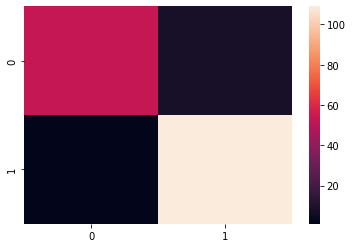

In [48]:
sns.heatmap(confusion_matrix(test_y,pred))

<AxesSubplot:>

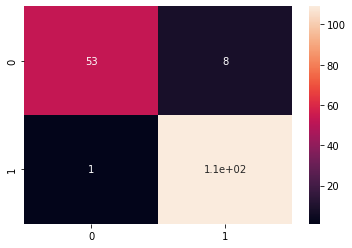

In [49]:
sns.heatmap(confusion_matrix(test_y,pred),annot=True)

In [50]:

#def cancerpredict(p):
    p=p.reshape(1,-1)
    pred=lg.predict(p)
    print("predicted value",pred)
    if pred==0:
        print('person does not have cancer')
    else:
        print("person has cancer")

IndentationError: unexpected indent (Temp/ipykernel_12764/1825565900.py, line 2)

In [ ]:
#p=np.array([17.99,10.3,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890])
#cancerpredict(p)

In [ ]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
pred=gnb.predict(test_x)
print("accuracy_score:",accuracy_score(test_y,pred))

In [ ]:
confusion_matrix(test_y,pred)

In [ ]:
print(classification_report(test_y,pred))

In [ ]:
def cancerpredict(p):
    p=p.reshape(1,-1)
    pred=gnb.predict(P)
    print("predicted value",pred)
    if pred==0:
        print('person does not have cancer')
    else:
        print("person has cancer")

In [ ]:
P=np.array([17.99,10,38,0.276])
cancerpredict(P)

In [ ]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

In [ ]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Logistic Regression')
plt.show()

In [ ]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))

In [ ]:
auc_score

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
preddtc=dtc.predict(test_x)
preddtc
ac=accuracy_score(test_y,preddtc)
round(ac,3)

In [ ]:
drom sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()

plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,'k--')#linestyle='--'

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Reciever operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("Accuracy_score:",m,'is')
    print(accuracy_score(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ds=pd.read_csv('Concrete_Data.csv')
ds

In [ ]:
data=pd.DataFrame(data=ds)
data

In [ ]:
data.shape

In [ ]:
data.dtypes

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data.describe()

In [ ]:
data['Age'].plot.box()

In [ ]:
data.plot?

In [ ]:
data.plot(kind='box',subplots=True,layout=(2,5))

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
data['Age'].plot.hist()

In [ ]:
data['Age']=np.log(data['Age'])
data['Age'].plot.hist()

In [ ]:
data['Age'].plot.hist()

In [ ]:
sns.distplot(data['Age'])

In [ ]:
for i in data.columns:
    plt.figure()
    sns.distplot(data[i])

In [ ]:
y=data.iloc[:,-1]
y.head()

In [ ]:
y.shape

In [ ]:
x=data.iloc[:,0:8]
x

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)

In [ ]:
train_x

In [ ]:
train_x.shape

In [ ]:
train_y.shape

In [ ]:
test_x.shape

In [ ]:
test_y.shape

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(train_x,train_y)

In [ ]:
lm.score(train_x,train_y)

In [ ]:
lm.intercept_

In [ ]:
pred=lm.predict(test_x)

In [ ]:
(pred,test_y)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,test_y))

In [ ]:
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)
    t=lm.predict(testvalue)
    print(t)

In [ ]:
testv=np.array([540.0,136.15867622,3745696,34.42189872,18.70824839,31.92557897,24.0,28.0])
predicttest(testv)

# testing various models in one function